# <center>Plotting Skew-T diagrams of Real Data</center>

## <font color=purple>This routine reads in a location from a file and a grib file and produces a skewT plot with a hodograph and a table of thermodynamic variables</font>

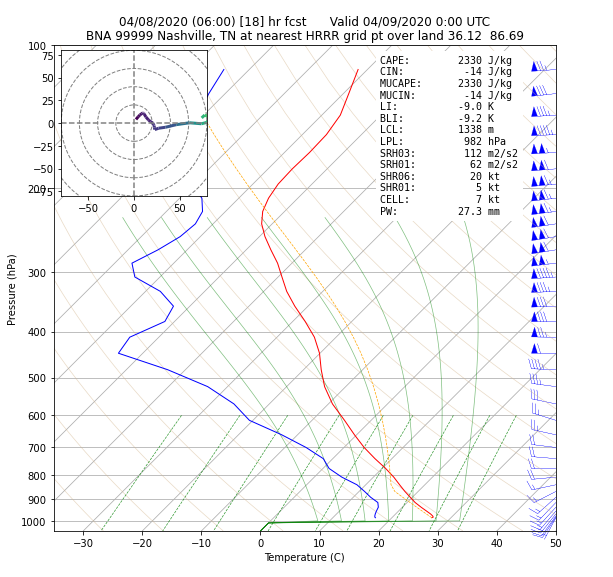

### Known issues (4 May 2020):

 * *code*
    - **switch pygrib reads to pyNio**
 
 * *background and labels*
    - use negative for longitude label
    - **change x-axis from deg C to deg K**
    - labels for background lines
    - add 850 and 250 hPa lines
   
 * *skew plots*
    - plot parcel profile only when greater than T
      
 * *hodograph*
    - color by height instead of wind speed

 * *thermodynamics*
    - **use earth-realtive wind conversions**
    

### Import needed tools

In [2]:
import pygrib
import numpy as np
import Nio
import pandas as pd

import adb_graphics.datahandler.grib as grib
import adb_graphics.figures.maps as maps
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import matplotlib.font_manager as fm

import metpy.calc as mpcalc

from metpy.plots import Hodograph, SkewT
from metpy.units import units
from metpy.future import precipitable_water

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

### Read in profile location data

In [3]:
metar = open(r'conus_raobs.txt','r')
data = metar.readline()

site_code = data[1:4]
site_num = data[12:17]
site_lat = data[19:24]
site_lon = data[25:31]
site_name = data[37:].rstrip()

print(site_name)
print(site_code, site_num)
print(site_lat, site_lon)

metar.close()

Nashville, TN
BNA 99999
36.12  86.69


### Input raw data

In [4]:
#filename = 'wrfnat_hrconus_00.2020040612.grib2'
filename = '/lfs1/projects/nrtrr/Craig.Hartsough/adb_graphics/wrfnat_hrconus_18.2020040806.grib2'




In [5]:
grbs = pygrib.open(filename)

In [8]:
for grb in grbs:
    print(grb)

1:Pressure:Pa (instant):lambert:hybrid:level 1:fcst time 18 hrs:from 202004080600
2:Cloud mixing ratio:kg kg**-1 (instant):lambert:hybrid:level 1:fcst time 18 hrs:from 202004080600
3:Ice water mixing ratio:kg kg**-1 (instant):lambert:hybrid:level 1:fcst time 18 hrs:from 202004080600
4:Rain mixing ratio:kg kg**-1 (instant):lambert:hybrid:level 1:fcst time 18 hrs:from 202004080600
5:Snow mixing ratio:kg kg**-1 (instant):lambert:hybrid:level 1:fcst time 18 hrs:from 202004080600
6:Graupel (snow pellets):kg kg**-1 (instant):lambert:hybrid:level 1:fcst time 18 hrs:from 202004080600
7:28:28 (instant):lambert:hybrid:level 1:fcst time 18 hrs:from 202004080600
8:29:29 (instant):lambert:hybrid:level 1:fcst time 18 hrs:from 202004080600
9:100:100 (instant):lambert:hybrid:level 1:fcst time 18 hrs:from 202004080600
10:193:193 (instant):lambert:hybrid:level 1:fcst time 18 hrs:from 202004080600
11:192:192 (instant):lambert:hybrid:level 1:fcst time 18 hrs:from 202004080600
12:Fraction of cloud cover:(0

203:Ice water mixing ratio:kg kg**-1 (instant):lambert:hybrid:level 11:fcst time 18 hrs:from 202004080600
204:Rain mixing ratio:kg kg**-1 (instant):lambert:hybrid:level 11:fcst time 18 hrs:from 202004080600
205:Snow mixing ratio:kg kg**-1 (instant):lambert:hybrid:level 11:fcst time 18 hrs:from 202004080600
206:Graupel (snow pellets):kg kg**-1 (instant):lambert:hybrid:level 11:fcst time 18 hrs:from 202004080600
207:28:28 (instant):lambert:hybrid:level 11:fcst time 18 hrs:from 202004080600
208:29:29 (instant):lambert:hybrid:level 11:fcst time 18 hrs:from 202004080600
209:100:100 (instant):lambert:hybrid:level 11:fcst time 18 hrs:from 202004080600
210:193:193 (instant):lambert:hybrid:level 11:fcst time 18 hrs:from 202004080600
211:192:192 (instant):lambert:hybrid:level 11:fcst time 18 hrs:from 202004080600
212:Fraction of cloud cover:(0 - 1) (instant):lambert:hybrid:level 11:fcst time 18 hrs:from 202004080600
213:Geopotential Height:gpm (instant):lambert:hybrid:level 11:fcst time 18 hrs:f

291:192:192 (instant):lambert:hybrid:level 15:fcst time 18 hrs:from 202004080600
292:Fraction of cloud cover:(0 - 1) (instant):lambert:hybrid:level 15:fcst time 18 hrs:from 202004080600
293:Geopotential Height:gpm (instant):lambert:hybrid:level 15:fcst time 18 hrs:from 202004080600
294:Temperature:K (instant):lambert:hybrid:level 15:fcst time 18 hrs:from 202004080600
295:Specific humidity:kg kg**-1 (instant):lambert:hybrid:level 15:fcst time 18 hrs:from 202004080600
296:U component of wind:m s**-1 (instant):lambert:hybrid:level 15:fcst time 18 hrs:from 202004080600
297:V component of wind:m s**-1 (instant):lambert:hybrid:level 15:fcst time 18 hrs:from 202004080600
298:Vertical velocity:Pa s**-1 (instant):lambert:hybrid:level 15:fcst time 18 hrs:from 202004080600
299:Turbulent kinetic energy:J kg**-1 (instant):lambert:hybrid:level 15:fcst time 18 hrs:from 202004080600
300:Mass density:concentration (instant):lambert:hybrid:level 15:fcst time 18 hrs:from 202004080600
301:Pressure:Pa (ins

402:Cloud mixing ratio:kg kg**-1 (instant):lambert:hybrid:level 21:fcst time 18 hrs:from 202004080600
403:Ice water mixing ratio:kg kg**-1 (instant):lambert:hybrid:level 21:fcst time 18 hrs:from 202004080600
404:Rain mixing ratio:kg kg**-1 (instant):lambert:hybrid:level 21:fcst time 18 hrs:from 202004080600
405:Snow mixing ratio:kg kg**-1 (instant):lambert:hybrid:level 21:fcst time 18 hrs:from 202004080600
406:Graupel (snow pellets):kg kg**-1 (instant):lambert:hybrid:level 21:fcst time 18 hrs:from 202004080600
407:28:28 (instant):lambert:hybrid:level 21:fcst time 18 hrs:from 202004080600
408:29:29 (instant):lambert:hybrid:level 21:fcst time 18 hrs:from 202004080600
409:100:100 (instant):lambert:hybrid:level 21:fcst time 18 hrs:from 202004080600
410:193:193 (instant):lambert:hybrid:level 21:fcst time 18 hrs:from 202004080600
411:192:192 (instant):lambert:hybrid:level 21:fcst time 18 hrs:from 202004080600
412:Fraction of cloud cover:(0 - 1) (instant):lambert:hybrid:level 21:fcst time 18 

531:192:192 (instant):lambert:hybrid:level 27:fcst time 18 hrs:from 202004080600
532:Fraction of cloud cover:(0 - 1) (instant):lambert:hybrid:level 27:fcst time 18 hrs:from 202004080600
533:Geopotential Height:gpm (instant):lambert:hybrid:level 27:fcst time 18 hrs:from 202004080600
534:Temperature:K (instant):lambert:hybrid:level 27:fcst time 18 hrs:from 202004080600
535:Specific humidity:kg kg**-1 (instant):lambert:hybrid:level 27:fcst time 18 hrs:from 202004080600
536:U component of wind:m s**-1 (instant):lambert:hybrid:level 27:fcst time 18 hrs:from 202004080600
537:V component of wind:m s**-1 (instant):lambert:hybrid:level 27:fcst time 18 hrs:from 202004080600
538:Vertical velocity:Pa s**-1 (instant):lambert:hybrid:level 27:fcst time 18 hrs:from 202004080600
539:Turbulent kinetic energy:J kg**-1 (instant):lambert:hybrid:level 27:fcst time 18 hrs:from 202004080600
540:Mass density:concentration (instant):lambert:hybrid:level 27:fcst time 18 hrs:from 202004080600
541:Pressure:Pa (ins

618:Vertical velocity:Pa s**-1 (instant):lambert:hybrid:level 31:fcst time 18 hrs:from 202004080600
619:Turbulent kinetic energy:J kg**-1 (instant):lambert:hybrid:level 31:fcst time 18 hrs:from 202004080600
620:Mass density:concentration (instant):lambert:hybrid:level 31:fcst time 18 hrs:from 202004080600
621:Pressure:Pa (instant):lambert:hybrid:level 32:fcst time 18 hrs:from 202004080600
622:Cloud mixing ratio:kg kg**-1 (instant):lambert:hybrid:level 32:fcst time 18 hrs:from 202004080600
623:Ice water mixing ratio:kg kg**-1 (instant):lambert:hybrid:level 32:fcst time 18 hrs:from 202004080600
624:Rain mixing ratio:kg kg**-1 (instant):lambert:hybrid:level 32:fcst time 18 hrs:from 202004080600
625:Snow mixing ratio:kg kg**-1 (instant):lambert:hybrid:level 32:fcst time 18 hrs:from 202004080600
626:Graupel (snow pellets):kg kg**-1 (instant):lambert:hybrid:level 32:fcst time 18 hrs:from 202004080600
627:28:28 (instant):lambert:hybrid:level 32:fcst time 18 hrs:from 202004080600
628:29:29 (in

733:Geopotential Height:gpm (instant):lambert:hybrid:level 37:fcst time 18 hrs:from 202004080600
734:Temperature:K (instant):lambert:hybrid:level 37:fcst time 18 hrs:from 202004080600
735:Specific humidity:kg kg**-1 (instant):lambert:hybrid:level 37:fcst time 18 hrs:from 202004080600
736:U component of wind:m s**-1 (instant):lambert:hybrid:level 37:fcst time 18 hrs:from 202004080600
737:V component of wind:m s**-1 (instant):lambert:hybrid:level 37:fcst time 18 hrs:from 202004080600
738:Vertical velocity:Pa s**-1 (instant):lambert:hybrid:level 37:fcst time 18 hrs:from 202004080600
739:Turbulent kinetic energy:J kg**-1 (instant):lambert:hybrid:level 37:fcst time 18 hrs:from 202004080600
740:Mass density:concentration (instant):lambert:hybrid:level 37:fcst time 18 hrs:from 202004080600
741:Pressure:Pa (instant):lambert:hybrid:level 38:fcst time 18 hrs:from 202004080600
742:Cloud mixing ratio:kg kg**-1 (instant):lambert:hybrid:level 38:fcst time 18 hrs:from 202004080600
743:Ice water mixin

888:29:29 (instant):lambert:hybrid:level 45:fcst time 18 hrs:from 202004080600
889:100:100 (instant):lambert:hybrid:level 45:fcst time 18 hrs:from 202004080600
890:193:193 (instant):lambert:hybrid:level 45:fcst time 18 hrs:from 202004080600
891:192:192 (instant):lambert:hybrid:level 45:fcst time 18 hrs:from 202004080600
892:Fraction of cloud cover:(0 - 1) (instant):lambert:hybrid:level 45:fcst time 18 hrs:from 202004080600
893:Geopotential Height:gpm (instant):lambert:hybrid:level 45:fcst time 18 hrs:from 202004080600
894:Temperature:K (instant):lambert:hybrid:level 45:fcst time 18 hrs:from 202004080600
895:Specific humidity:kg kg**-1 (instant):lambert:hybrid:level 45:fcst time 18 hrs:from 202004080600
896:U component of wind:m s**-1 (instant):lambert:hybrid:level 45:fcst time 18 hrs:from 202004080600
897:V component of wind:m s**-1 (instant):lambert:hybrid:level 45:fcst time 18 hrs:from 202004080600
898:Vertical velocity:Pa s**-1 (instant):lambert:hybrid:level 45:fcst time 18 hrs:from

1031:1:1 (instant):lambert:heightAboveGround:level 1 m:fcst time 18 hrs:from 202004080600
1032:1:1 (instant):lambert:heightAboveGround:level 2 m:fcst time 18 hrs:from 202004080600
1033:192:192 (instant):lambert:atmosphere:level 0 10:fcst time 18 hrs:from 202004080600
1034:197:197 (instant):lambert:heightAboveGroundLayer:levels 5000-2000 m:fcst time 18 hrs:from 202004080600
1035:197:197 (instant):lambert:heightAboveGroundLayer:levels 6000-1000 m:fcst time 18 hrs:from 202004080600
1036:Seconds prior to initial reference time (defined in Section 1):s (instant):lambert:heightAboveGround:level 1 m:fcst time 18 hrs:from 202004080600
1037:Seconds prior to initial reference time (defined in Section 1):s (instant):lambert:heightAboveGround:level 4 m:fcst time 18 hrs:from 202004080600
1038:Seconds prior to initial reference time (defined in Section 1):s (instant):lambert:heightAboveGround:level 2 m:fcst time 18 hrs:from 202004080600
1039:Seconds prior to initial reference time (defined in Sectio

1163:242:242 (instant):lambert:atmosphere:level 0 10:fcst time 18 hrs:from 202004080600
1164:Land-sea mask:(0 - 1) (instant):lambert:surface:level 0:fcst time 18 hrs:from 202004080600
1165:Sea ice area fraction:(0 - 1) (instant):lambert:surface:level 0:fcst time 18 hrs:from 202004080600
1166:1:1 (instant):lambert:nominalTop:level 0:fcst time 18 hrs:from 202004080600
1167:2:2 (instant):lambert:nominalTop:level 0:fcst time 18 hrs:from 202004080600
1168:7:7 (instant):lambert:nominalTop:level 0:fcst time 18 hrs:from 202004080600
1169:8:8 (instant):lambert:nominalTop:level 0:fcst time 18 hrs:from 202004080600


In [9]:
initDate  = "{:02}/{:02}/{} ({}:{:02})".format(grb.month,grb.day,grb.year,grb.hour,grb.minute)
valDate   = "{:02}/{:02}/{} {}:{:02} UTC".format(grb.validDate.month,grb.validDate.day,grb.validDate.year,grb.validDate.hour,grb.validDate.minute)
fcstHr    = grb.forecastTime

In [6]:
lats, lons = grb.latlons()
x, y = np.unravel_index((np.abs(lats - float(site_lat)) + np.abs(lons - -float(site_lon))).argmin(), lats.shape)
x, y

NameError: name 'grb' is not defined

### collect data into vertical profiles

In [29]:
pr = grbs.select(name='Pressure', typeOfLevel='hybrid')
p_den = []

for p in pr:
    if p.values[x][y] >= 10000.:
        p_den.append(p.values[x][y])

p_den = p_den * units.Pa

In [12]:
gh = grbs.select(name='Geopotential Height', typeOfLevel='hybrid')
gh_den = []

for h in gh:
    gh_den.append(h.values[x][y])

gh_den = gh_den[0:p_den.size] * units.gpm

In [13]:
temp = grbs.select(name='Temperature', typeOfLevel='hybrid')
t_den = []
for t in temp:
    t_den.append(t.values[x][y]-273.16)

t_den = t_den[0:p_den.size] * units.degC

In [14]:
sphum = grbs.select(name='Specific humidity', typeOfLevel='hybrid')
sh_den = []
for sh in sphum:
    sh_den.append(sh.values[x][y])
    
sh_den = sh_den[0:p_den.size] * units.dimensionless

In [15]:
ucomp = grbs.select(name='U component of wind', typeOfLevel='hybrid')
u_den = []
for u in ucomp:
    u_den.append(u.values[x][y])

u_den = u_den[0:p_den.size] * units.meter_per_second

In [16]:
vcomp = grbs.select(name='V component of wind', typeOfLevel='hybrid')
v_den = []
for v in vcomp:
    v_den.append(v.values[x][y])

v_den = v_den[0:p_den.size] * units.meter_per_second

In [17]:
td_den = mpcalc.dewpoint_from_specific_humidity(sh_den, t_den, p_den)

wspd_den = mpcalc.wind_speed(u_den, v_den)

### testing Nio calls to replace pygrib

In [8]:
f = Nio.open_file(filename)

In [ ]:
print(f)

In [20]:
initDate = f.variables['PRES_P0_L105_GLC0'].initial_time
fcstHr = f.variables['PRES_P0_L105_GLC0'].forecast_time
print(initDate, fcstHr)

04/08/2020 (06:00) [18]


In [14]:
lats = f.variables['gridlat_0'][:]
lons = f.variables['gridlon_0'][:]

site_lat = 89
x, y = np.unravel_index((np.abs(lats - float(site_lat)) + np.abs(lons - -float(site_lon))).argmin(), lats.shape)
x, y

(1058, 1152)

In [16]:
x = np.shape(lons)

In [22]:
p_skew  = f.variables['PRES_P0_L105_GLC0'][:,x,y]

gh_skew = f.variables['HGT_P0_L105_GLC0'][:,x,y]

t_skew  = f.variables['TMP_P0_L105_GLC0'][:,x,y]

sh_skew = f.variables['SPFH_P0_L105_GLC0'][:,x,y]

u_skew  = f.variables['UGRD_P0_L105_GLC0'][:,x,y]

v_skew  = f.variables['VGRD_P0_L105_GLC0'][:,x,y]

### collect thermodynamics from grib file

In [23]:
cape_skew = f.variables['CAPE_P0_L1_GLC0'][x][y]
cin_skew = f.variables['CIN_P0_L1_GLC0'][x][y]

mucape_skew = f.variables['CAPE_P0_2L108_GLC0'][2][x][y]
mucin_skew = f.variables['CIN_P0_2L108_GLC0'][2][x][y]

li_skew = f.variables['LFTX_P0_2L100_GLC0'][x][y]
bli_skew = f.variables['4LFTX_P0_2L108_GLC0'][x][y]

lcl_skew = f.variables['HGT_P0_L5_GLC0'][x][y]
lpl_skew = f.variables['PLPL_P0_2L108_GLC0'][x][y]/100.

srh03_skew = f.variables['HLCY_P0_2L103_GLC0'][1][x][y]
srh01_skew = f.variables['HLCY_P0_2L103_GLC0'][0][x][y]

shr06_skew = np.round(np.sqrt(f.variables['VUCSH_P0_2L103_GLC0'][1][x][y]**2 + f.variables['VVCSH_P0_2L103_GLC0'][1][x][y]))
shr01_skew = np.round(np.sqrt(f.variables['VUCSH_P0_2L103_GLC0'][0][x][y]**2 + f.variables['VVCSH_P0_2L103_GLC0'][0][x][y]))

cell_skew = np.round(np.sqrt(f.variables['USTM_P0_2L103_GLC0'][x][y]**2 + f.variables['VSTM_P0_2L103_GLC0'][x][y]))

pw_skew = f.variables['PWAT_P0_L200_GLC0'][x][y]

In [18]:
print(f.variables['HLCY_P0_2L103_GLC0'])

Variable: HLCY_P0_2L103_GLC0
Type: float
Total Size: 15241128 bytes
            3810282 values
Number of Dimensions: 3
Dimensions and sizes:	[lv_HTGL5 | 2] x [ygrid_0 | 1059] x [xgrid_0 | 1799]
Coordinates: 
            lv_HTGL5: not a coordinate variable
            ygrid_0: not a coordinate variable
            xgrid_0: not a coordinate variable
Number of Attributes: 13
         center :	NOAA Forecast Systems Lab, Boulder CO
         production_status :	Research products
         long_name :	Storm relative helicity
         units :	m2 s-2
         _FillValue :	1e+20
         coordinates :	gridlat_0 gridlon_0
         grid_type :	Lambert Conformal can be secant or tangent, conical or bipolar
         parameter_discipline_and_category :	Meteorological products, Thermodynamic stability indices
         parameter_template_discipline_category_number :	[0, 0, 7, 8]
         level_type :	Specified height level above ground (m)
         forecast_time :	18
         forecast_time_units :	hours

In [20]:
print(f.variables['TMP_P0_L105_GLC0'])

Variable: TMP_P0_L105_GLC0
Type: float
Total Size: 381028200 bytes
            95257050 values
Number of Dimensions: 3
Dimensions and sizes:	[lv_HYBL0 | 50] x [ygrid_0 | 1059] x [xgrid_0 | 1799]
Coordinates: 
            lv_HYBL0: [ 1..50]
            ygrid_0: not a coordinate variable
            xgrid_0: not a coordinate variable
Number of Attributes: 13
         center :	NOAA Forecast Systems Lab, Boulder CO
         production_status :	Research products
         long_name :	Temperature
         units :	K
         _FillValue :	1e+20
         coordinates :	gridlat_0 gridlon_0
         grid_type :	Lambert Conformal can be secant or tangent, conical or bipolar
         parameter_discipline_and_category :	Meteorological products, Temperature
         parameter_template_discipline_category_number :	[0, 0, 0, 0]
         level_type :	Hybrid level
         forecast_time :	18
         forecast_time_units :	hours
         initial_time :	04/08/2020 (06:00)



### Skew-T code

generate skewT figure, and plot T, Td, and wind barbs

/contrib/miniconda3/4.5.12/envs/adb_graphics/lib/python3.8/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


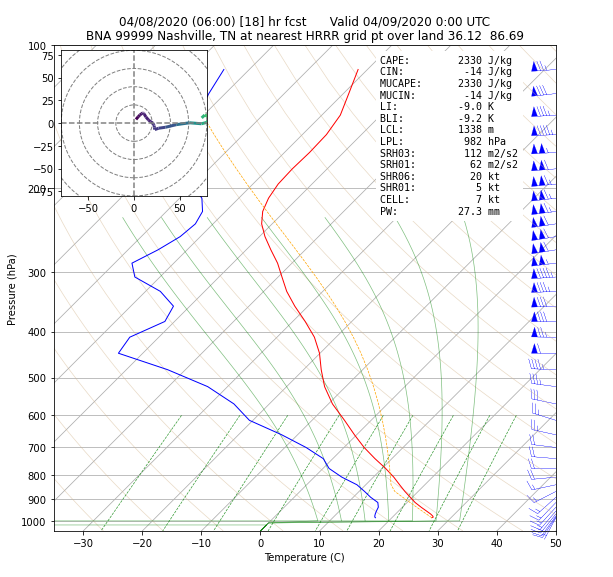

In [24]:
# Create a new figure. The dimensions here give a good aspect ratio
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig, rotation=45)
title = "{} {} hr fcst      Valid {}\n"\
        "{} {} {} at nearest HRRR grid pt over land {} {}".format(initDate, fcstHr, valDate, site_code, site_num, site_name, site_lat, site_lon)
plt.title(title, ha='center')

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p_den, t_den, 'r', linewidth=1)
skew.plot(p_den, td_den, 'blue', linewidth=1)
skew.plot_barbs(p_den, u_den.to('knots'), v_den.to('knots'), color='blue', linewidth=0.2)
skew.ax.set_xlabel('Temperature (C)')
skew.ax.set_ylabel('Pressure (hPa)')
skew.ax.set_ylim(1050, 100)
skew.ax.set_xlim(-35, 50)

# Plot LCL temperature as black dot
#skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black')

# Calculate the parcel profile.
parcel_prof = mpcalc.parcel_profile(p_den, t_den[0], td_den[0]).to('degC')
# Plot the parcel profile as a dashed orange line
skew.plot(p_den, parcel_prof,'orange', linewidth=0.7, linestyle='dashed')

# Shade areas of CAPE and CIN
#skew.shade_cin(p_den, t_den, parcel_prof)
#skew.shade_cape(p_den, t_den, parcel_prof)

# Plot a zero degree isotherm
#skew.ax.axvline(0, color='c', linestyle='solid', linewidth=1)

# Add the relevant special lines
dry_adiabats = np.arange(-40,210,10) * units.degC
skew.plot_dry_adiabats(dry_adiabats,colors='tan', linestyles='solid', linewidth=0.7)
moist_adiabats = np.arange(8,36,4) * units.degC
moist_pr = np.arange(1050,220,-10) * units.hPa
skew.plot_moist_adiabats(moist_adiabats,moist_pr,colors='green', linestyles='solid', linewidth=0.7)
mixing_lines = [1,2,3,5,8,12,16,20] * units.dimensionless
mix_pr = np.arange(1050,400,-50) * units.hPa
skew.plot_mixing_lines(colors='green', linewidth=0.7)

# add text box of thermodynamic values
skew.ax.text(0.65,0.98,'CAPE:  {:10.0f} J/kg\n'\
                       'CIN:   {:10.0f} J/kg\n'\
                       'MUCAPE:{:10.0f} J/kg\n'\
                       'MUCIN: {:10.0f} J/kg\n'\
                       'LI:    {:10.1f} K\n'\
                       'BLI:   {:10.1f} K\n'\
                       'LCL:   {:10.0f} m\n'\
                       'LPL:   {:10.0f} hPa\n'\
                       'SRH03: {:10.0f} m2/s2\n'\
                       'SRH01: {:10.0f} m2/s2\n'\
                       'SHR06: {:10.0f} kt\n'\
                       'SHR01: {:10.0f} kt\n'\
                       'CELL:  {:10.0f} kt\n'\
                       'PW:    {:10.1f} mm'.format(cape_skew, cin_skew, mucape_skew, mucin_skew, li_skew, bli_skew, lcl_skew, lpl_skew, srh03_skew, srh01_skew, shr06_skew, shr01_skew, cell_skew, pw_skew),
             transform=skew.ax.transAxes,
             size=8,
             fontproperties=fm.FontProperties(family='monospace'),
             verticalalignment='top',
             bbox=dict(facecolor='white',edgecolor='white'))

# Create a hodograph
# Create an inset axes object that is 30% width and height of the
# figure and put it in the upper left hand corner.
ax_hod = inset_axes(skew.ax, '30%', '30%', loc=2)
h = Hodograph(ax_hod, component_range=80.)
h.add_grid(increment=20)
h.plot_colormapped(u_den.to('knots'), v_den.to('knots'), wspd_den.to('knots'))  # Plot a line colored by wind speed

# Show the plot
plt.show()

<font color=red>Thermodynamics are nowread from grib.  Saving these for the time being, but not using them...</font>

In [25]:
# Calculate the LCL
lcl_pressure, lcl_temperature = mpcalc.lcl(p_den[0], t_den[0], td_den[0])

# Calculate the parcel profile.
parcel_prof = mpcalc.parcel_profile(p_den, t_den[0], td_den[0]).to('degC')

# calculate CAPE and CIN
cape, cin = mpcalc.cape_cin(p_den, t_den, td_den, parcel_prof)

# calculate MUCAPE and MUCIN
mucape, mucin = mpcalc.cape_cin(p_den, t_den, td_den, parcel_prof, which_lfc='most_cape', which_el='most_cape')

# calculate precipitable water
pw = precipitable_water(p_den, td_den)

# calculate bulk shear (6-km layer and 1-km layer)
u_shear_1km,v_shear_1km = mpcalc.bulk_shear(p_den,u_den,v_den,gh_den,depth=1000.*units.meter)
shr01 = np.round(np.sqrt(u_shear_1km**2 + v_shear_1km**2)).to('knots')
u_shear_6km,v_shear_6km = mpcalc.bulk_shear(p_den,u_den,v_den,gh_den,depth=6000.*units.meter)
shr06 = np.round(np.sqrt(u_shear_6km**2 + v_shear_6km**2)).to('knots')

# calculate storm-relative helicity (3-km layer and 1-km layer)
srh_0to3_pos, srh_0to3_neg, srh_0to3_tot = mpcalc.storm_relative_helicity(u_den,v_den,gh_den,3000 * units.meter, bottom=gh_den[0])
srh_0to1_pos, srh_0to1_neg, srh_0to1_tot = mpcalc.storm_relative_helicity(u_den,v_den,gh_den,1000 * units.meter, bottom=gh_den[0])
srh03 = srh_0to3_tot
srh01 = srh_0to1_tot

print('CAPE:     ', cape)
print('CIN:      ', cin)
print('MUCAPE:   ', mucape)
print('MUCIN:    ', mucin)
print('SRH03:    ', srh03)
print('SRH01:    ', srh01)
print('SHR06:    ', shr06)
print('SHR01:    ', shr01)
print('LPL:      ', lcl_pressure.to('hPa'))
print('PW:       ', pw)

CAPE:      2028.6632003765335 joule / kilogram
CIN:       -61.57851112329045 joule / kilogram
MUCAPE:    2028.6632003765335 joule / kilogram
MUCIN:     -61.57851112329045 joule / kilogram
SRH03:     81.07340381654485 meter ** 2 / second ** 2
SRH01:     28.131724815156097 meter ** 2 / second ** 2
SHR06:     48.59611231101512 knot
SHR01:     11.663066954643629 knot
LPL:       856.5597917327469 hectopascal
PW:        27.18129101386707 millimeter


/contrib/miniconda3/4.5.12/envs/adb_graphics/lib/python3.8/site-packages/metpy/calc/kinematics.py:580: FutureWarning: Input variables will be reordered in 1.0 to be (heights, u, v, depth, bottom, storm_u, storm_v). To update to new input format before 1.0 is released, use `from metpy.future import storm_relative_helicity`.
  warnings.warn('Input variables will be reordered in 1.0 to be (heights, u, v, depth, '
